In [ ]:
import os
import matplotlib.pyplot as plt

print(os.getcwd())

c:\dev\credit-risk-pd


In [6]:
os.chdir("..")
print(os.getcwd())

c:\dev\credit-risk-pd


In [7]:
import numpy as np
import pandas as pd

from src.models.train_baseline import train_and_predict

pipeline, X_val, y_val, y_val_pred = train_and_predict()

In [8]:
thresholds = np.arange(0.02, 0.28, 0.01)
overall_default_rate = y_val.mean()

rows = []
for t in thresholds: 
    rejected = y_val_pred >= t
    approved = ~rejected

    n_total = len(y_val)
    n_approved = approved.sum()
    n_rejected = rejected.sum()

    # Among approved, how many acutally defaulted
    approved_defaults = y_val[approved].sum()

    # Among rejected, how many were actual defaults
    rejected_defaults = y_val[rejected].sum()
    total_defaults = y_val.sum()

    approval_rate = n_approved / n_total
    default_capture_rate = rejected_defaults / total_defaults

    if n_approved > 0:
        bad_rate_approved = approved_defaults / n_approved 
    else:
        bad_rate_approved = 0
    
    rows.append({
        "threshold": round(t, 3),
        "approval_rate": round(approval_rate, 4),
        "default_capture_rate": round(default_capture_rate, 4),
        "bad_rate_approved": round(bad_rate_approved, 4),
    })

df_thresh = pd.DataFrame(rows)

df_thresh



,threshold,approval_rate,default_capture_rate,bad_rate_approved
0,0.02,0.1161,0.9851,0.0104
1,0.03,0.2283,0.9553,0.0158
2,0.04,0.3352,0.9172,0.0199
3,0.05,0.4338,0.8683,0.0245
4,0.06,0.5168,0.8201,0.0281
5,0.07,0.5858,0.7664,0.0322
6,0.08,0.6440,0.7122,0.0361
7,0.09,0.6923,0.6582,0.0399
8,0.10,0.7346,0.6081,0.0431
9,0.11,0.7712,0.5662,0.0454


In [9]:
print(X_val["AMT_CREDIT"].mean())
print(X_val["AMT_CREDIT"].median())

597777.06
512064.0


In [10]:
mean_loan_amount = X_val["AMT_CREDIT"].mean()
n_applicants = len(y_val)

# Assuming a worst-case scenario with a loss-given-default (LGD) of 100%
df_thresh["expected_loss"] = (
    df_thresh["bad_rate_approved"] *
    df_thresh["approval_rate"] *
    n_applicants *
    mean_loan_amount
)

df_thresh["expected_loss_per_1000"] = (
    df_thresh["bad_rate_approved"] * 1000 * mean_loan_amount
)

df_thresh["defaults_approved"] = (
    df_thresh["bad_rate_approved"] *
    df_thresh["approval_rate"] *
    len(y_val)
)

df_thresh

,threshold,approval_rate,default_capture_rate,bad_rate_approved,expected_loss,expected_loss_per_1000,defaults_approved
0,0.02,0.1161,0.9851,0.0104,4.439163e+07,6.216881e+06,74.261182
1,0.03,0.2283,0.9553,0.0158,1.326168e+08,9.444878e+06,221.849931
2,0.04,0.3352,0.9172,0.0199,2.452407e+08,1.189576e+07,410.254531
3,0.05,0.4338,0.8683,0.0245,3.907430e+08,1.464554e+07,653.660034
4,0.06,0.5168,0.8201,0.0281,5.339055e+08,1.679754e+07,893.151486
5,0.07,0.5858,0.7664,0.0322,6.934909e+08,1.924842e+07,1160.116328
6,0.08,0.6440,0.7122,0.0361,8.547293e+08,2.157975e+07,1429.846345
7,0.09,0.6923,0.6582,0.0399,1.015553e+09,2.385130e+07,1698.883223
8,0.10,0.7346,0.6081,0.0431,1.164029e+09,2.576419e+07,1947.262474
9,0.11,0.7712,0.5662,0.0454,1.287237e+09,2.713908e+07,2153.372557


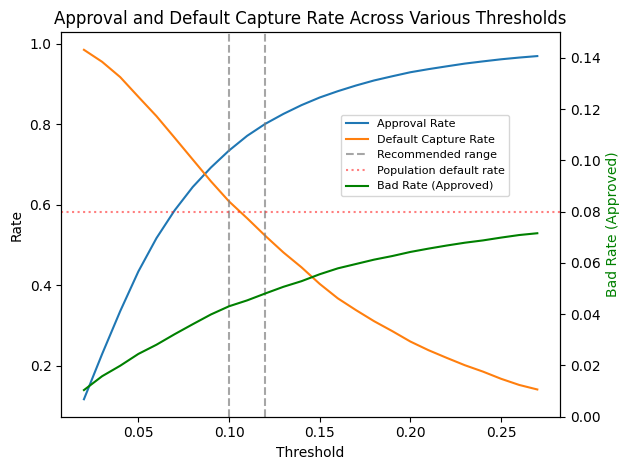

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(df_thresh["threshold"], df_thresh["approval_rate"], label="Approval Rate")
ax1.plot(df_thresh["threshold"], df_thresh["default_capture_rate"], label="Default Capture Rate")
ax1.axvline(x=0.10, color='grey', linestyle='--', alpha=0.7, label="Recommended range")
ax1.axvline(x=0.12, color='grey', linestyle='--', alpha=0.7)
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Rate")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.axhline(y=0.08, color='red', linestyle=':', alpha=0.5, label='Population default rate')
ax2.plot(df_thresh["threshold"], df_thresh["bad_rate_approved"], label="Bad Rate (Approved)", color='green')
ax2.set_ylabel("Bad Rate (Approved)", color='green')
ax2.set_ylim(0, 0.15)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper left',
           bbox_to_anchor=(0.55, 0.8),
           fontsize=8)

plt.title("Approval and Default Capture Rate Across Various Thresholds")
plt.tight_layout()
plt.savefig("reports/threshold_analysis.png", dpi=200)
plt.show()




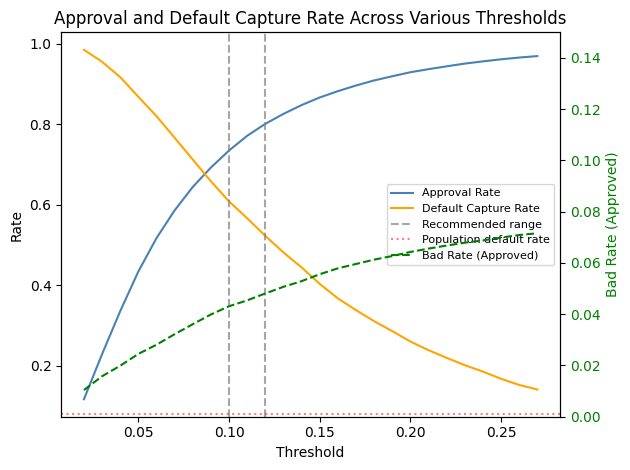

In [32]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Primary y-axis — rates between 0 and 1
ax1.plot(df_thresh["threshold"], df_thresh["approval_rate"], 
         label="Approval Rate", color='steelblue')
ax1.plot(df_thresh["threshold"], df_thresh["default_capture_rate"], 
         label="Default Capture Rate", color='orange')
ax1.axvline(x=0.10, color='grey', linestyle='--', alpha=0.7, label="Recommended range")
ax1.axvline(x=0.12, color='grey', linestyle='--', alpha=0.7)
ax1.axhline(y=0.08, color='red', linestyle=':', alpha=0.5, label='Population default rate')
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Rate")
ax1.tick_params(axis='y')

# Secondary y-axis — bad rate approved (smaller scale)
ax2 = ax1.twinx()
ax2.plot(df_thresh["threshold"], df_thresh["bad_rate_approved"], 
         label="Bad Rate (Approved)", color='green', linestyle='--')
ax2.set_ylabel("Bad Rate (Approved)", color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 0.15)  # constrain so it doesn't dominate

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right', fontsize=8)

plt.title("Approval and Default Capture Rate Across Various Thresholds")
plt.tight_layout()
plt.savefig("reports/threshold_analysis.png", dpi=200)
plt.show()

### Threshold Analysis

As the predicted PD threshold beyond which an applicants gets rejected increases, the approval rate rises and the default capture rate falls. At just a threshold 0.25, over 96% of applicants applicants are approved but only 17% of actual defaults find themselves in the rejection pile. This means 83% of defaulters infiltrate the approved portfolio. At threshold 0.02, nearly all defaults are caught but only 12% of applicants are approved, which is commercially not feasible. 

Finding the optimal threshold requires a study of this tension which ultimatly lies between two types of error. The first of which consists of applicants who defaults. Namely, a false negative. The cost is a loan loss, assuming a worst case scenrio of 100% LGD (Loss Given Default) and thus the business does not claim any collateral. The other of which consists of rejecting an applicant who would have repaid. Namely, a false positive. The cost of which is relinquished interest revenue. Because loan losses typically exceed the revenue from a single performing loan, the cost of false negatives far exceed the cost of false positives, which supports the argument for a threshold below the naive 50% classification boundary. 

The recommended operating range is 0.10–0.12 predicted PD. At threshold 0.10, the model approves 73.5% of applicants, captures 60.8% of all defaults in the rejected pile, and the approved portfolio carries a bad rate of 
4.3% — roughly half the population default rate of 8%. Expected loss per 1000 approved applicants is approximately 25.8M assuming mean loan size and 100% LGD.

Tightening by falling below threshold 0.10 yields diminishing returns. That is, default capture improves by roughly 0.05 per 0.01 threshold drop, but the approval rate cost per step rises from 4.2 to 8.3 percentage points. So you'd pay twice as much in foregone approvals for the same default capture improvement.

Loosening by exceeding threshold 0.12 concedes disproportionate default risk for a small growth in portfolio. In the recommended 0.10–0.12 range, each additional percentage point of approval rate costs 
approximately 450k in expected loss per 1000 applicants. Beyond 0.12 that cost rises to 616k at threshold 0.14 and 864k at threshold 0.16 — nearly double the cost for the same marginal approval gain. The 0.10–0.12 range therefore represents the region of most efficient risk-adjusted portfolio growth.

